In [2]:
from dataclasses import dataclass
from typing import List
import numpy as np
import matplotlib.pyplot as plt

import read_processed_data as rpd

In [4]:
events_1500 = rpd.read("analysis/output_1500.txt")

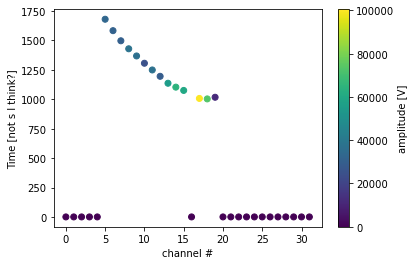

In [117]:
event1 = events_1500[1890]

# sc = plt.scatter(event1.channels, event1.amps, c=event1.times, cmap=plt.get_cmap('viridis'))
# plt.colorbar(sc, label="Time [s]")
# plt.ylabel("amplitude [V]")

sc = plt.scatter(event1.channels, event1.times, c=event1.amps, cmap=plt.get_cmap('viridis'))
plt.colorbar(sc, label="amplitude [V]")
plt.ylabel("Time [not s I think?]")
#all the tracks seem to get the min hit time at ~1000

plt.xlabel("channel #")
plt.show()

In [68]:
#find horizontal track maybe?

dt = 100

for i, event in enumerate(events_1500):
    removeZerosTimes = [x for x in event.times if x != 0]
    variance = np.var(removeZeros)
#     print(variance)
    #horizontal tracks should have basically no variance in the timing of hits
    if variance < dt & len(removeZeros) > 2: #not right
        print(i, len(removeZeros))

825 4
894 4
2680 5
5752 5


In [122]:
#get drift times
'''
The source is mounted on a movable arm, 58.5mm from the GEM and 53mm to the cathode plane,
set to one side 59mm to the closest wall (to the right facing downstream with the alpha particle
beam)
'''
dist_to_GEM = 58.8 #mm
dist_to_cathode = 53 #mm

#62.5 MHz for data taking freq. -> so our times need to be corrected with this to get to s units

dt_data = 1/(62.5e6) #s
# print(dt_data*1000)

timingArr = []

for i, event in enumerate(events_1500):
    removeZerosTimes = [x for x in event.times if x != 0]
    #should also only look at tracks that are heading up and we think
    #hit a GEM, didn't just petter out
    variance = np.var(removeZerosTimes)
    
    if (8 > len(removeZerosTimes) > 4) & (variance > 800):
        dt  = (np.max(removeZerosTimes) - np.min(removeZerosTimes)) * dt_data
        #     len(event_removeZeros)
        dy = dist_to_GEM/1e3 #m
    #     print(dt, dy)

        if dy/dt != np.inf:
            timingArr.append(dy/dt)
    
aveDriftTime = np.average(timingArr) #m/s
errorDriftTime = np.std(timingArr) #m/s

print(aveDriftTime, errorDriftTime)

16789.778785330138 11972.359988232321


In [ ]:
# aveDriftTime - 

#distance = aveDriftTime*